# Seaborn

## distplot, kdeplot, jointplot, pairplot, rugplot, categorical plots, matrix plot, grid

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# For viewing the visulaizations inside of notebook
%matplotlib inline

In [6]:
# Seaborn comes with few builtin datasets
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### dist plot

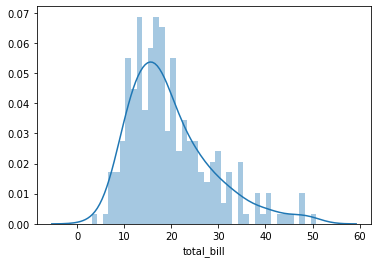

In [5]:
#Distplot will visualise 1 entity (like one coulmn or one row at a time)
sns.distplot(tips['total_bill'],bins=40)
#For deleting that blue line you can add this aguement (kde=False) 
#For customizing bin quantity you can add (bins=n)

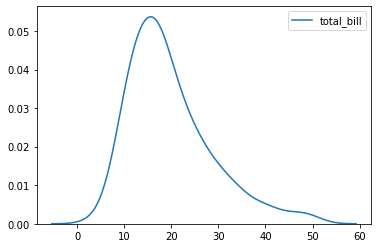

In [6]:
sns.kdeplot(tips['total_bill'])

### Jointplot

#### Joining two dist plots

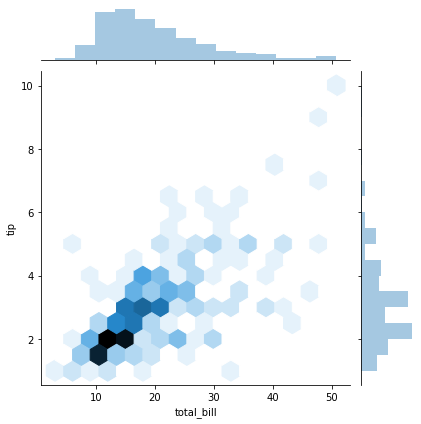

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
#x and y are the two coulmns(entities) to compare
#data is your dataset
#kind is the type of plot inside two distplots kind can be hex, kde,reg and etc 
#but best practice is to not include this kind as perameters (default is best)

### Pairplot

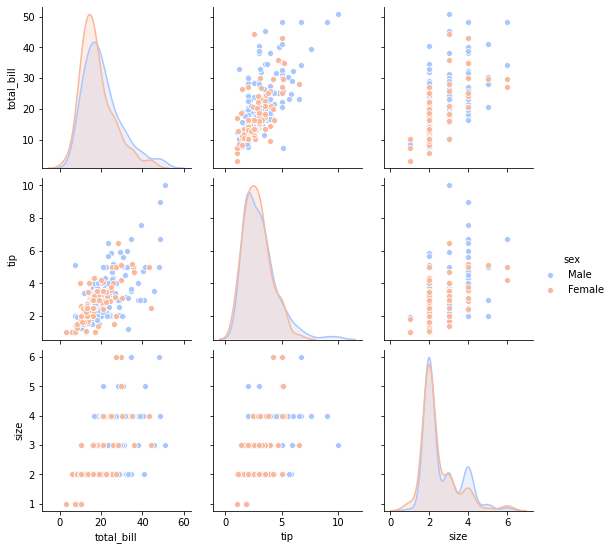

In [8]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#First argue is your dataset name
#2nd argue is hue : if you have any categorial coulmn in your dataset like sex you can pass it in hue to visualize it
#3rd is palatte and it is about colors

### Rugplot

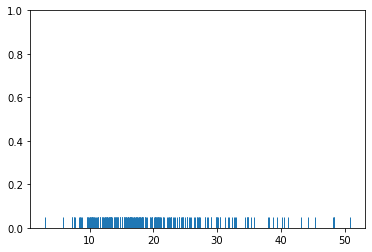

In [9]:
sns.rugplot(tips['total_bill'])
#It simply draws a dash mark for every single point along the distribution line  

# Categorical Plots

In [10]:
import numpy as np

## Barplot

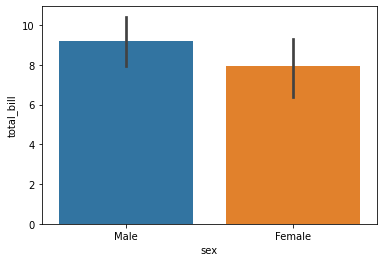

In [11]:
# Any operation on a numerical coulmn with categorical coulmn (like mean) by default it will be mean and 
# if you want your own function enter another perameter(estimator= ) in equation
# And pass your function in it
# x is going to be categorical and y is going to numerical always
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

## Countplot

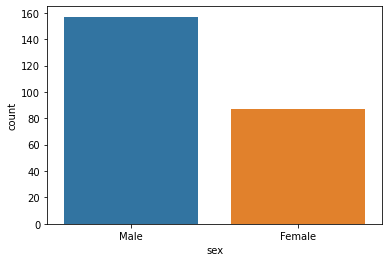

In [12]:
# x is going to be categorical and y is going to numerical always 
sns.countplot(x='sex',data=tips)

## Boxplot

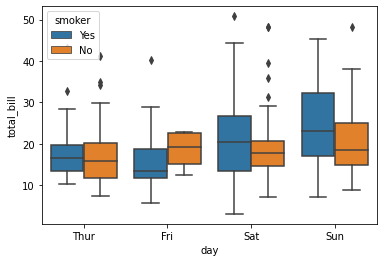

In [13]:
# x is going to be categorical and y is going to numerical always
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

## violinplot

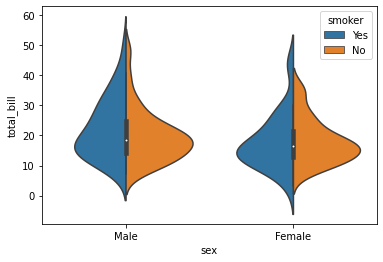

In [14]:
# x is going to be categorical and y is going to numerical always
sns.violinplot(x='sex',y='total_bill',data=tips,hue='smoker',split=True)

## stripplot

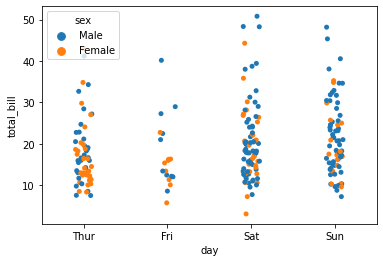

In [15]:
# x is going to be categorical and y is going to numerical always
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex')

## Swarmplot

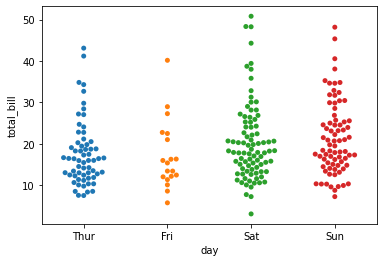

In [16]:
sns.swarmplot(x='day',y='total_bill',data=tips)

## Factorplot

C:\Users\Mubashar Ateeq\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


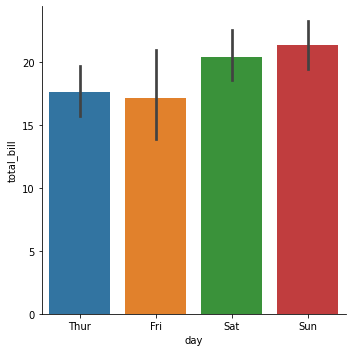

In [17]:
# You just call factorplot and tell its kind
# Kind can be violin and bar and strip
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

# Matrix Plot

In [18]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In [19]:
# We need data in matrix for matrix plots
tc = tips.corr()

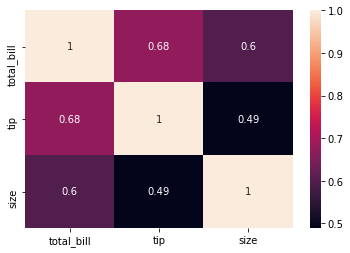

In [20]:
sns.heatmap(tc,annot=True)

In [21]:
# Flights data in matrix form
ab=flights.pivot_table(index='month',columns='year',values='passengers')

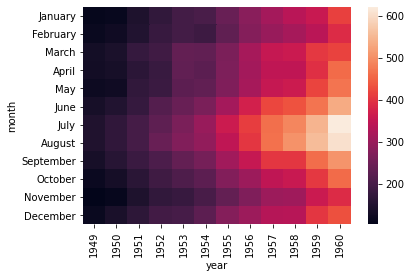

In [22]:
sns.heatmap(ab) #,linecolor='white',linewidth=1

## Clustermap

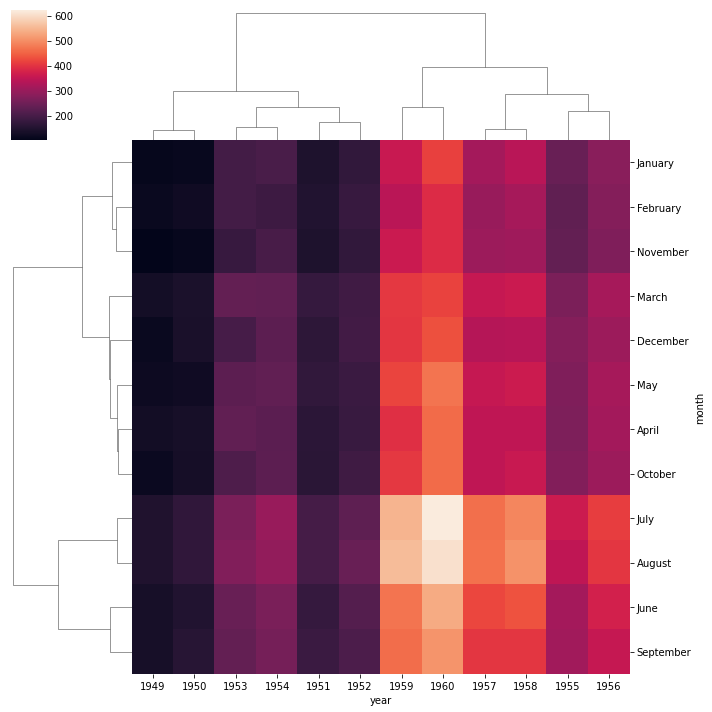

In [23]:
sns.clustermap(ab) #,cmap='coolwarm',standard_scale=1

# Grids

In [26]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

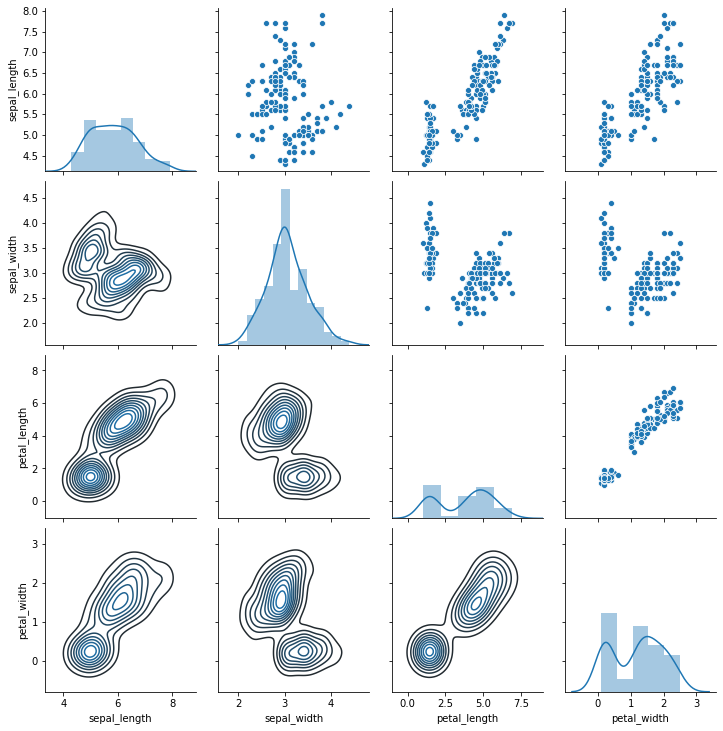

In [31]:
#You can use pair grid instea of pairplot for more contol
#Like you can change the graph types and etc.
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

## FacetGrid

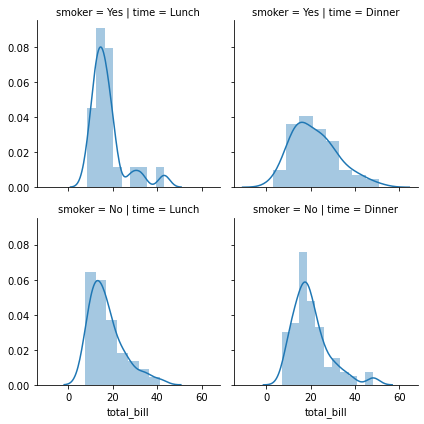

In [33]:
# In dacetGrid you can customize coulmns data and rows data
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill') #g.map(sns.scatterplot,'total_bill','tip') bcoz scatterplot needs 2 argues 

## Regression Plot

### Linear Model Plot -- lmplot()

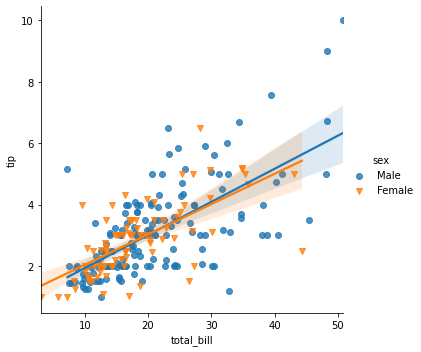

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

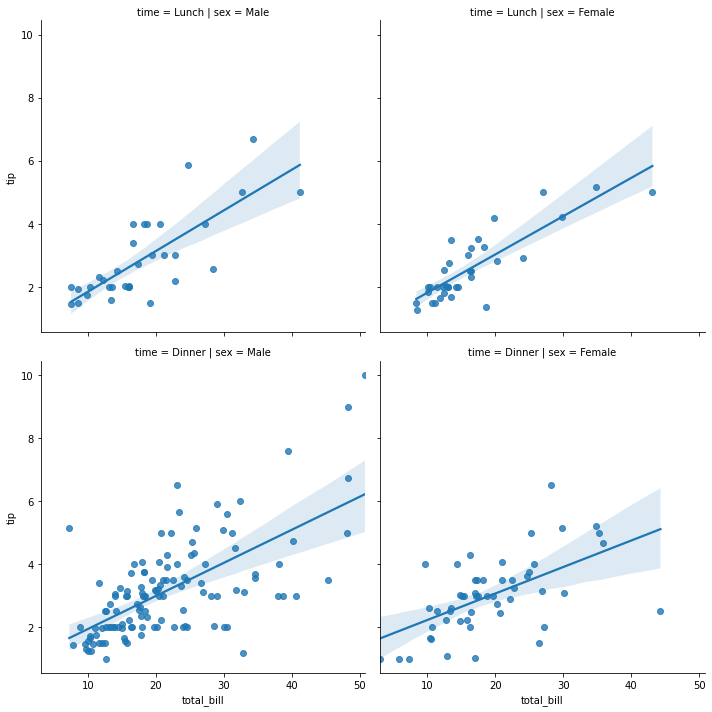

In [8]:
# Instead of caling hue we cann call row and col like we did in facetgrid
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

C:\Users\Mubashar Ateeq\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


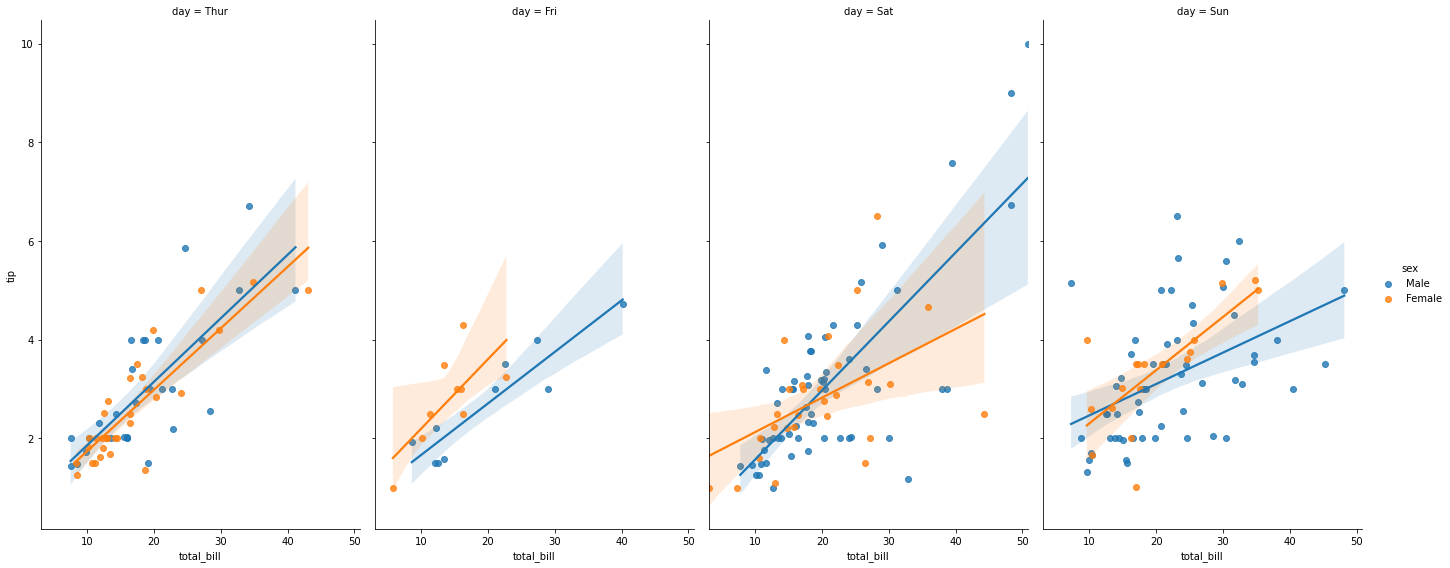

In [10]:
# Example for adjusting the aspect ratio and size
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',col='day',aspect=0.6,size=8)

## Style and Color

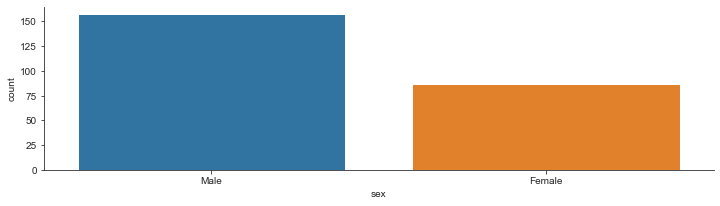

In [18]:
plt.figure(figsize=(12,3))#For changing the size
sns.set_style('ticks') #You can pass 'white', 'darkgrid', 'whitegrid' too
sns.countplot(x='sex',data=tips)
# Despine for removing right and upper lines of figure
sns.despine() #You can pass peramteres left=True and bottom=true

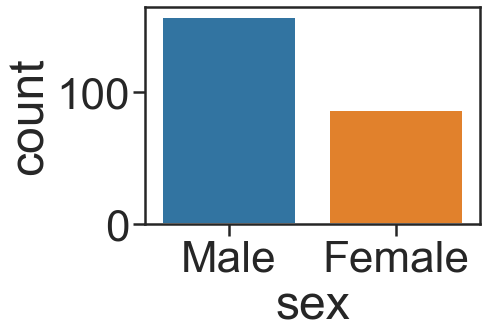

In [19]:
sns.set_context('poster',font_scale=2) #Changing size by seaborn
sns.countplot(x='sex',data=tips)